In [1]:
# In this notebook

# scrape multiple images from website
# scrape useful data like telephone number
# scrape meta data like site contributor
# next step: utilize object-orient programming for site crawler

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import numpy as np
import pandas as pd

In [3]:
wurl = 'https://www.lsbu.ac.uk/'

In [4]:
whtml = urlopen(wurl)
wres = BeautifulSoup(whtml.read(),'html5lib')

In [5]:
print(wres.title.getText())

Home | London South Bank University


In [6]:
# find the first ten links on th homepage
# useful for crawling / scraping entire site
wtags = wres.findAll('a', {'href':re.compile("https*")})[:10]

for tag in wtags:
    print(tag.text.strip())
    print(tag.get('href').strip())

Student portal
https://my.lsbu.ac.uk/my/applicant
Staff intranet
https://our.lsbu.ac.uk/
Alumni
https://alumni.lsbu.ac.uk/

https://www.lsbu.ac.uk
Study
https://www.lsbu.ac.uk/courses
Courses
https://www.lsbu.ac.uk/courses
Course finder
https://www.lsbu.ac.uk/courses/course-finder
Why choose LSBU?
https://www.lsbu.ac.uk/courses/featured/why-choose-lsbu
Open Days
https://www.lsbu.ac.uk/courses/featured/open-days
Undergraduate
https://www.lsbu.ac.uk/courses/undergraduate


In [7]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

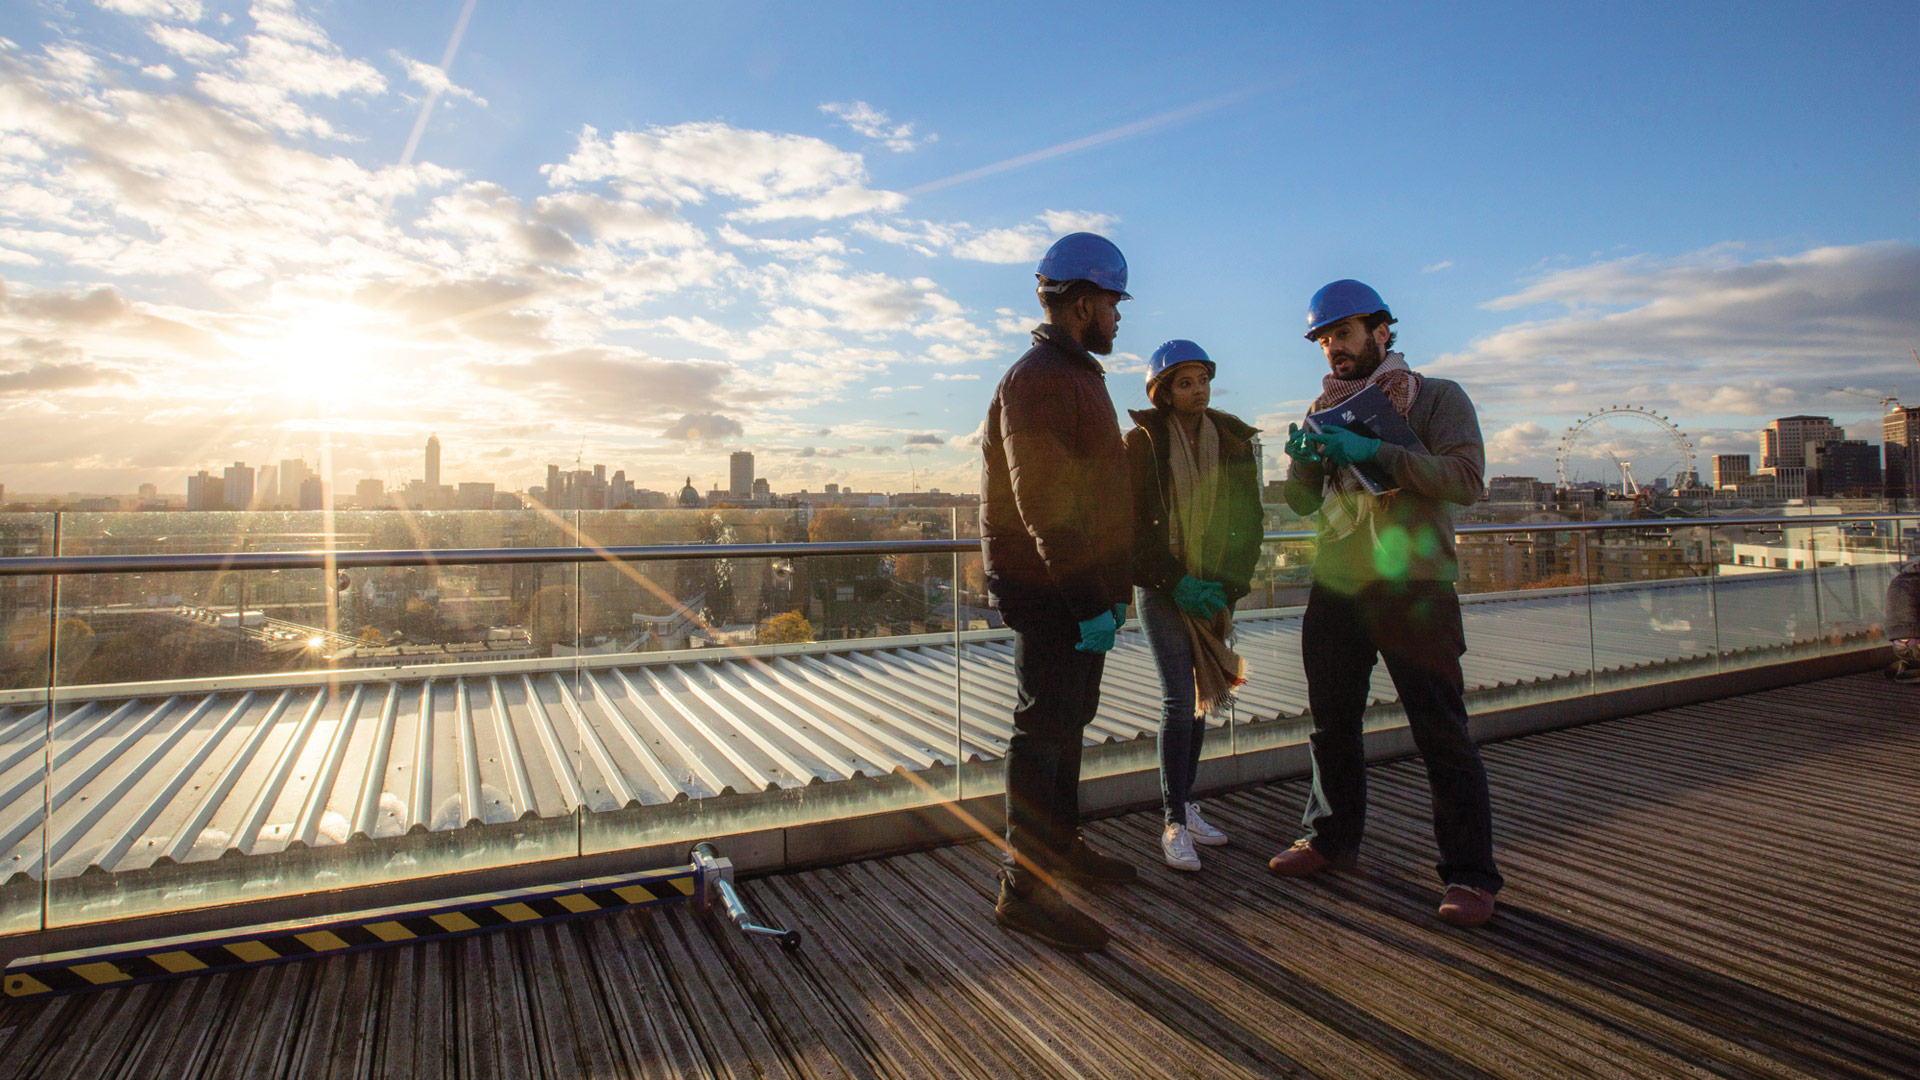

In [8]:
# find first image in html body
wtag = wres.find('body', {'class':'home_page'})
wtag = wtag.find('a', {'class':'home_banner_image_title '})
wtag = wtag.find('img', {'src':re.compile("https://*")})
wurl = wtag.attrs['src']
wimg = Image.open(urlopen(wurl))

wimg

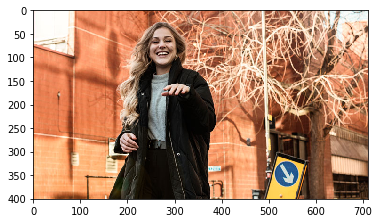

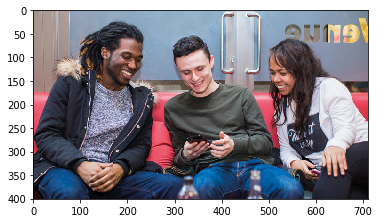

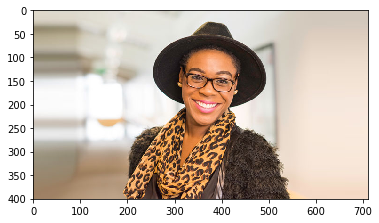

In [9]:
# find additional images
wtags = wres.findAll('img', {'src':re.compile("https://*")})[2:]
for tag in wtags:
    wurl = tag.attrs['src']
    wimg = Image.open(urlopen(wurl))
    plt.figure()
    plt.imshow(wimg)

In [10]:
# find span text in the bottom of the homepage
wtags = wres.findAll('span')[-10:]

for tag in wtags:
    if len(tag.attrs) == 0:
        print(tag.text.strip())

Linkedin
Google+
Accessibility
Terms & conditions
Privacy
FOI
Cookies
Contact us
Jobs
Modern slavery statement


In [62]:
# scrape phone numbers; regex needed across websites
wtel = wres.findAll('a', {'href':re.compile("tel:*")})

for tel in wtel:
    print (tel.getText())

020 7815 7815
0800 923 8888


In [58]:
# scrape meta data such as site contributor & created date
# meta data is not displayed on the webpage
wmeta = wres.findAll('meta')[:10]

for meta in wmeta:
    if meta.get('name') != None:
        print (f"Name: {meta.get('name')}   Content: {meta.get('content')}")

Name: viewport   Content: width=device-width, initial-scale=1
Name: DC.title   Content: Home
Name: DC.creator   Content: London South Bank University
Name: DC.subject   Content: lsbu,london south bank university,UK,higher education,degrees,courses,undergraduate,postgraduate,research,business,students,full-time,part-time,clearing,uni,london university
Name: DC.description   Content: <p>London South Bank University is known for its professional links and high graduate salaries. We are university of the year for graduate employment.&nbsp;&nbsp;Situated in the heart of the city &ndash; find a course, read the latest news and book on an Open Day. Start in September - apply now through Clearing!</p>
Name: DC.publisher   Content: London South Bank University
Name: DC.contributor   Content: Bergman, Annina
Name: DC.date.created   Content: 2013-05-15


In [65]:
# Note: unable to extract Twitter handles and hashtags; will explore this more

In [ ]:
# This concludes pt 02